## A Quick Look at Olympic Performance

The purpose of this analysis is to address a simple question: 

Which nations-- over the course of olympic history-- have the highest performance at the summer and winter games?

Instead of medals counts, our comparison will use point totals (3, 2, & 1 for gold, silver, & bronze, respectively). 

_This dataset was provided by University of Michigan's Introduction to Data Science in Python and originates from the Wikipedia entry on_ [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table).

In [2]:
%matplotlib inline

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load our medals data
medals = pd.read_csv('data/olympics.csv', index_col=0, skiprows=1)
medals.columns = ['Summer Games', 'Summer Gold', 'Summer Silver', 'Summer Bronze','Summer Total', 'Winter Games', 'Winter Gold',
            'Winter Silver', 'Winter Bronze', 'Winter Total', 'Total Games', 'Total Gold', 'Total Silver', 'Total Bronze', 'Combined Totals']
medals = medals.drop('Totals')

# clean country names
countries = medals.index.str.split('\s\(') 
medals.index = countries.str[0] 
medals['ID'] = countries.str[1].str[:3]

In [4]:
# calculate point totals based on medal counts
medals['Summer Points'] = ((medals['Summer Gold']*3) + (medals['Summer Silver']*2) + (medals['Summer Bronze']))
medals['Winter Points'] = ((medals['Winter Gold']*3) + (medals['Winter Silver']*2) + (medals['Winter Bronze']))
medals['Total Points'] = medals['Summer Points'] + medals['Winter Points']

# grab the top 25 countries by total points
top_25 = medals.sort_values(by='Total Points', ascending=False)
top_25 = top_25[:25]

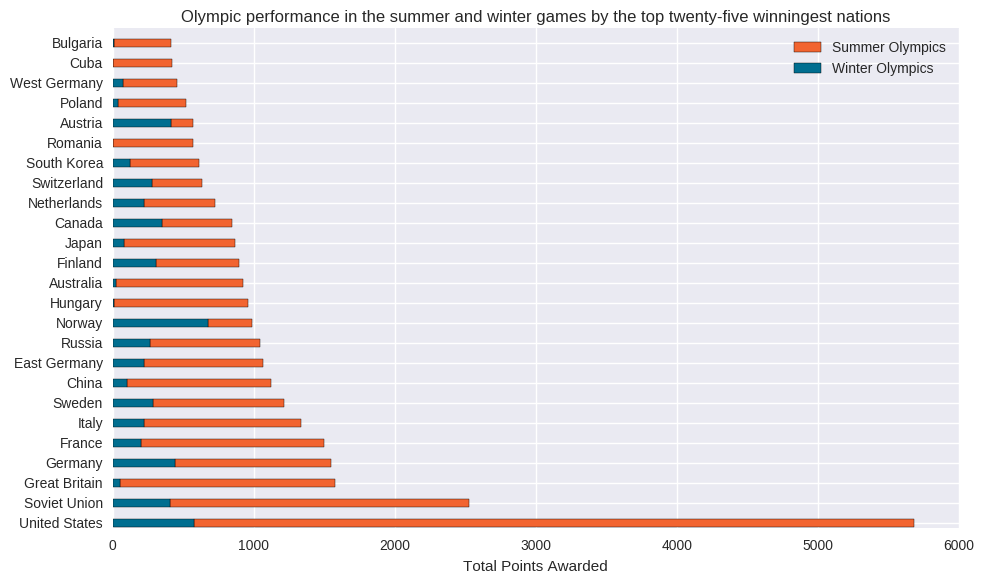

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
smr_pts = top_25['Summer Points']
wtr_pts = top_25['Winter Points']
ylocations = [i*2 + .5 for i in range(25)]
ax.barh(ylocations, smr_pts, left=wtr_pts, color='#f26430', label='Summer Olympics', align='center')
ax.barh(ylocations, wtr_pts, color='#006e90', label='Winter Olympics', align='center')
plt.yticks(ylocations, smr_pts.index)
plt.title('Olympic performance in the summer and winter games by the top twenty-five winningest nations')
plt.xlabel('Total Points Awarded')
ax.legend()
fig.tight_layout()